In [1]:
import pickle
import pandas as pd 
import numpy as np 
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

In [2]:
#with open ('{}/business_review_tip_checkin_df.pickle'.format(SHARED_FOLDER), 'rb') as f:
    #business_df = pickle.load(f)
business_df=pd.read_csv('{}/more_business.csv'.format(SHARED_FOLDER))
business_df

,Unnamed: 0,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,0,"{'Ambience': {'classy': False, 'trendy': False...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,...,25,25,25,25,25,25,2.391304,23,3,10
1,1,"{'Parking': {'garage': False, 'valet': False, ...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Friday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,...,16,7,16,7,16,7,4.216080,199,45,620
2,2,"{'Price Range': 2, 'Delivery': False, 'Wheelch...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,...,25,25,25,25,25,25,2.300000,30,7,22
3,3,"{'Parking': {'garage': False, 'valet': False, ...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,...,25,25,25,25,25,25,3.500000,46,9,150
4,4,"{'Caters': False, 'Delivery': False, 'Price Ra...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Friday': {'close': '23:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,...,22,10,22,10,22,10,2.600000,5,7,55
5,5,"{'Accepts Credit Cards': True, 'Parking': {'ga...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,...,0,0,0,0,0,0,4.200000,5,2,124
6,6,"{'Parking': {'garage': False, 'valet': False, ...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,...,25,25,25,25,25,25,3.666667,27,15,178
7,7,"{'Price Range': 1, 'Delivery': False, 'Wheelch...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,...,25,25,25,25,25,25,4.338710,62,15,171
8,8,"{'By Appointment Only': False, 'Parking': {'ga...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,...,0,0,0,0,0,0,2.875000,8,3,35
9,9,"{'Caters': False, 'Good For Dancing': False, '...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Friday': {'close': '02:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,...,2,11,1,11,1,11,2.756410,78,30,357


In [3]:
#del business_df['attributes.AgesAllowed']
del business_df['avg_review_stars']

In [4]:
import xgboost as xgb
import operator

In [5]:
#train=business_review_tip_checkin_df.columns[5]
features = list(business_df.columns[6:116])
X = business_df[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,open,review_count,attributes.AcceptsCreditCards,attributes.AcceptsInsurance,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,...,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,1,2,0,0,0,0,...,25,25,25,25,25,25,25,23,3,10
1,33.457226,-112.089834,False,216,1,2,1,1,0,0,...,7,16,7,16,7,16,7,199,45,620
2,33.678615,-111.974607,False,31,1,2,2,2,2,2,...,25,25,25,25,25,25,25,30,7,22
3,33.414355,-111.926294,True,46,1,2,1,1,0,0,...,25,25,25,25,25,25,25,46,9,150
4,33.379200,-111.785500,True,5,1,2,1,2,2,2,...,10,22,10,22,10,22,10,5,7,55
5,33.479867,-112.117920,True,6,1,2,0,2,2,2,...,0,0,0,0,0,0,0,5,2,124
6,33.407353,-111.945569,True,29,1,2,1,0,0,0,...,25,25,25,25,25,25,25,27,15,178
7,33.675854,-111.966734,False,62,1,2,3,2,2,2,...,25,25,25,25,25,25,25,62,15,171
8,33.267073,-111.686889,True,10,1,2,0,2,2,2,...,0,0,0,0,0,0,0,8,3,35
9,33.509568,-112.073327,True,85,1,2,2,1,0,0,...,11,2,11,1,11,1,11,78,30,357


In [6]:
y =business_df['stars']
y

0       2.5
1       4.5
2       2.5
3       3.5
4       2.5
5       4.5
6       3.5
7       4.5
8       3.0
9       2.5
10      2.5
11      3.5
12      4.0
13      3.0
14      3.0
15      4.0
16      3.5
17      4.0
18      2.5
19      4.0
20      2.5
21      3.0
22      4.5
23      4.0
24      4.5
25      3.5
26      1.5
27      4.0
28      4.5
29      4.0
       ... 
9654    4.0
9655    3.0
9656    2.0
9657    2.5
9658    3.0
9659    3.5
9660    4.0
9661    4.0
9662    1.5
9663    2.5
9664    2.5
9665    2.5
9666    3.0
9667    2.5
9668    4.0
9669    2.0
9670    4.0
9671    2.0
9672    5.0
9673    2.5
9674    4.0
9675    4.0
9676    3.0
9677    2.5
9678    3.5
9679    4.0
9680    4.0
9681    2.0
9682    4.0
9683    3.5
Name: stars, dtype: float64

In [7]:
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
'''
xgb_params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.2,
    'max_depth': 7,
    'lambda': 4,
    'subsample': 1,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.05,
    'seed': 1000,
}
'''
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 4121), ('longitude', 4040), ('checkin_count', 2326), ('review_count', 2096), ('reviews_count', 1351), ('tip_count', 1217), ('attributes.PriceRange', 484), ('hours.Friday.close', 478), ('attributes.Alcohol', 422), ('attributes.NoiseLevel', 410), ('hours.Sunday.open', 392), ('hours.Sunday.close', 366), ('attributes.WiFi', 362), ('attributes.OutdoorSeating', 346), ('hours.Friday.open', 340), ('open', 336), ('attributes.Caters', 319), ('attributes.DriveThru', 319), ('hours.Monday.close', 314), ('hours.Saturday.open', 307), ('hours.Saturday.close', 306), ('attributes.WheelchairAccessible', 302), ('attributes.Parking.lot', 295), ('attributes.WaiterService', 291), ('attributes.Delivery', 246), ('attributes.GoodForGroups', 245), ('attributes.Ambience.casual', 234), ('hours.Thursday.close', 221), ('hours.Monday.open', 215), ('attributes.GoodFor.lunch', 205), ('attributes.TakesReservations', 180), ('attributes.GoodFor.breakfast', 162), ('hours.Wednesday.close', 153), ('hours.Tuesda

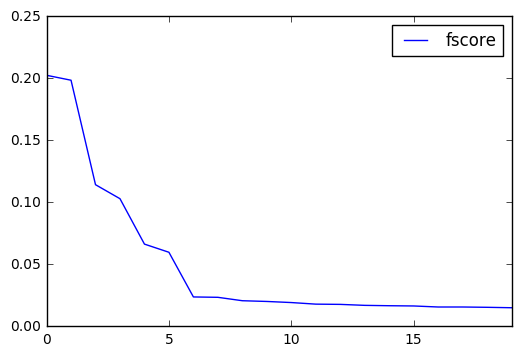

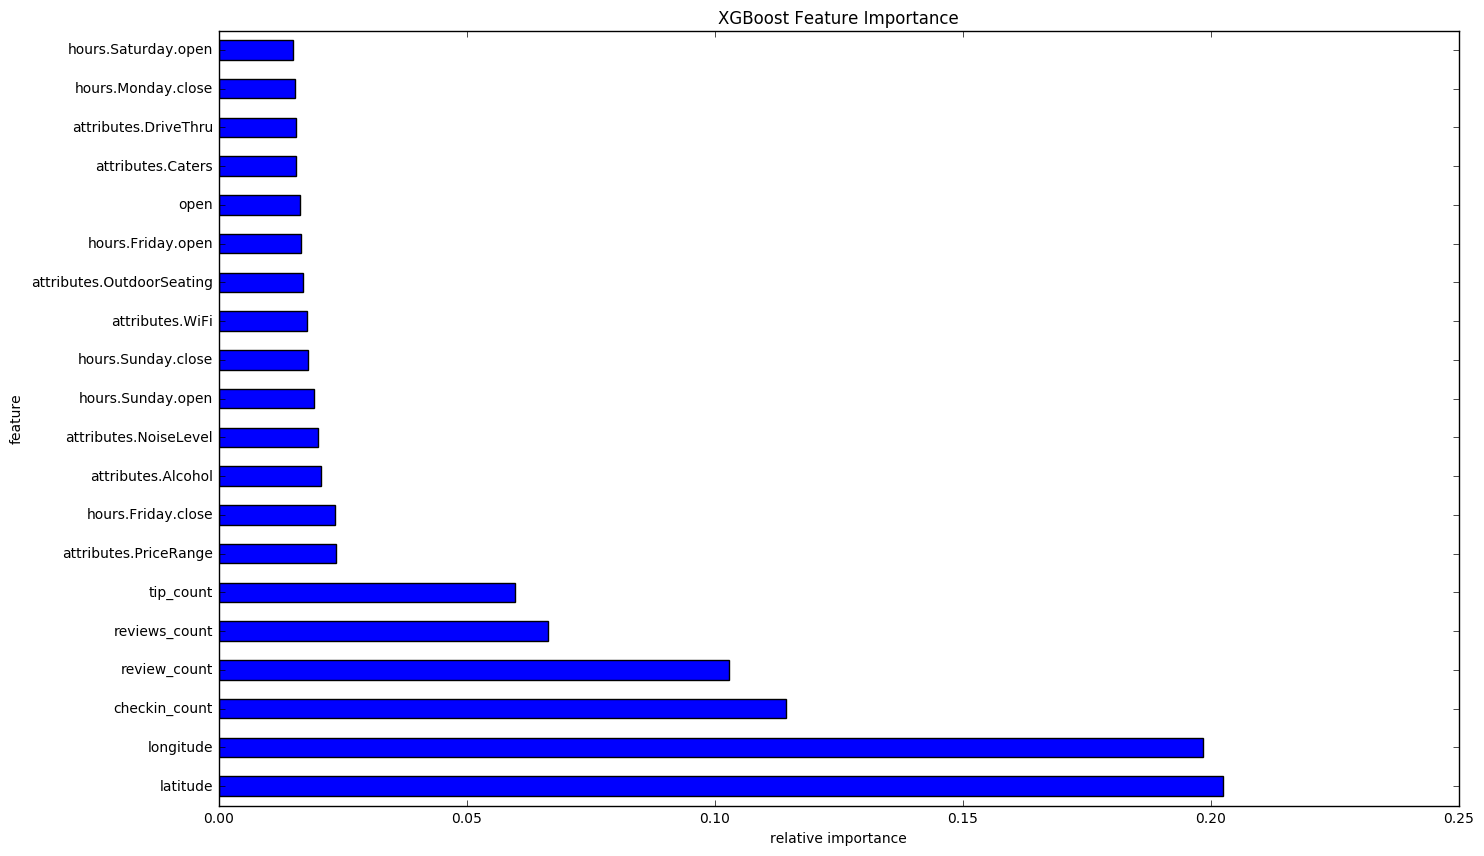

In [23]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [36]:
all_df['feature'].head(40).tolist()


['latitude',
 'longitude',
 'checkin_count',
 'review_count',
 'reviews_count',
 'tip_count',
 'attributes.PriceRange',
 'hours.Friday.close',
 'attributes.Alcohol',
 'attributes.NoiseLevel',
 'hours.Sunday.open',
 'hours.Sunday.close',
 'attributes.WiFi',
 'attributes.OutdoorSeating',
 'hours.Friday.open',
 'open',
 'attributes.Caters',
 'attributes.DriveThru',
 'hours.Monday.close',
 'hours.Saturday.open',
 'hours.Saturday.close',
 'attributes.WheelchairAccessible',
 'attributes.Parking.lot',
 'attributes.WaiterService',
 'attributes.Delivery',
 'attributes.GoodForGroups',
 'attributes.Ambience.casual',
 'hours.Thursday.close',
 'hours.Monday.open',
 'attributes.GoodFor.lunch',
 'attributes.TakesReservations',
 'attributes.GoodFor.breakfast',
 'hours.Wednesday.close',
 'hours.Tuesday.close',
 'attributes.Parking.garage',
 'attributes.AcceptsCreditCards',
 'attributes.Parking.street',
 'attributes.Attire',
 'hours.Thursday.open',
 'attributes.GoodFor.brunch']

In [45]:
X = business_df[all_df['feature'].head(50).tolist()]
#del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,checkin_count,review_count,reviews_count,tip_count,attributes.PriceRange,hours.Friday.close,attributes.Alcohol,attributes.NoiseLevel,...,attributes.DogsAllowed,attributes.Takeout,attributes.GoodFor.dinner,attributes.ByAppointmentOnly,attributes.GoodFor.dessert,hours.Wednesday.open,attributes.Ambience.divey,hours.Tuesday.open,attributes.GoodFor.latenight,attributes.BYOB/Corkage
0,33.422218,-111.925847,10,23,23,3,1,25,0,1,...,2,1,1,2,0,25,0,25,1,0
1,33.457226,-112.089834,620,216,199,45,1,16,1,2,...,1,1,0,2,0,7,0,7,0,0
2,33.678615,-111.974607,22,31,30,7,2,25,2,0,...,2,1,1,2,0,25,2,25,0,0
3,33.414355,-111.926294,150,46,46,9,1,25,1,2,...,2,1,0,2,0,25,0,25,0,0
4,33.379200,-111.785500,55,5,5,7,1,23,1,2,...,2,1,2,2,2,10,2,10,2,0
5,33.479867,-112.117920,124,6,5,2,1,0,0,0,...,2,2,2,2,2,0,2,0,2,0
6,33.407353,-111.945569,178,29,27,15,1,25,1,2,...,2,1,1,2,0,25,0,25,0,0
7,33.675854,-111.966734,171,62,62,15,1,25,3,0,...,2,1,0,2,0,25,2,25,0,0
8,33.267073,-111.686889,35,10,8,3,2,0,0,0,...,2,2,2,0,2,0,2,0,2,0
9,33.509568,-112.073327,357,85,78,30,2,2,2,2,...,2,1,0,2,0,11,0,11,1,0


In [46]:
from sklearn import cross_validation, metrics
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.8}
num_rounds = 1000
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)

((array([-3.56938978, -3.32997769, -3.19781246, ...,  3.19781246,
          3.32997769,  3.56938978]),
  array([-2.61343431, -2.56400394, -2.49027348, ...,  2.01601195,
          2.6193254 ,  2.67713737])),
 (0.64043121189015817, 0.014514279876348513, 0.99659261175812952))

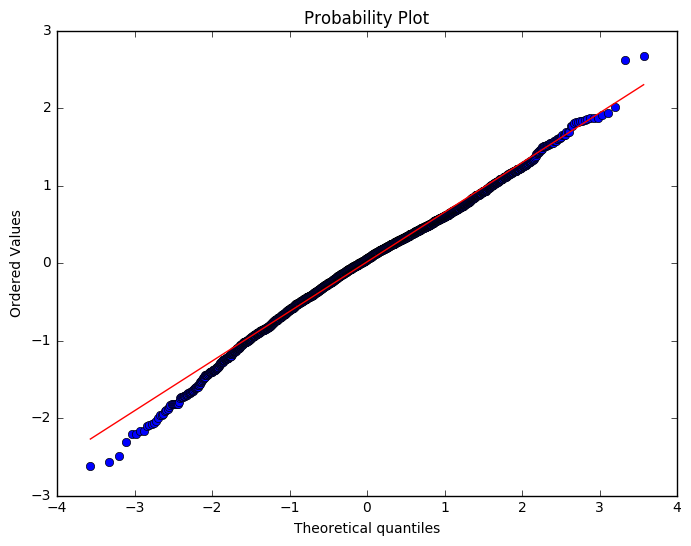

In [10]:
%matplotlib inline
from scipy.stats import probplot
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot(111)
probplot(y_test - ans, plot=ax)

In [47]:
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
r_square

0.28022442196390129

In [49]:
metrics.mean_squared_error(y_test, ans)

0.4144807371720392